In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np

plt.rcParams['figure.figsize'] = (7, 3.5)

In [2]:
signals = ['C', 'R', 'D', 'nand0', 'nand1', 'nand2', 'nand3', 'Q', 'nand5']
data = np.fromfile('/tmp/spice-out.txt', sep=' ').reshape(-1, 2 * len(signals))
t = {s: data[:, 2*j] for j, s in enumerate(signals)}
x = {s: data[:, 2*j+1] for j, s in enumerate(signals)}

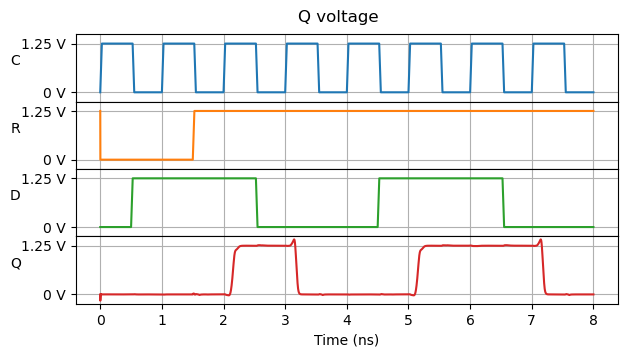

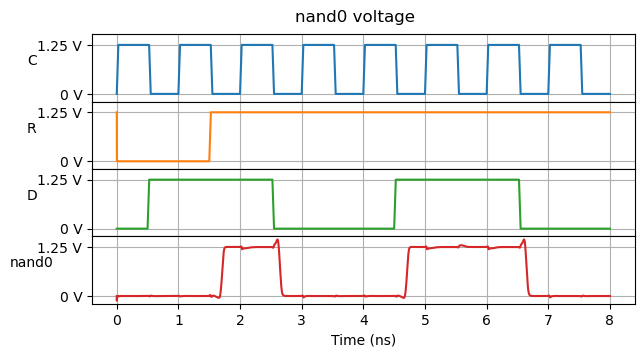

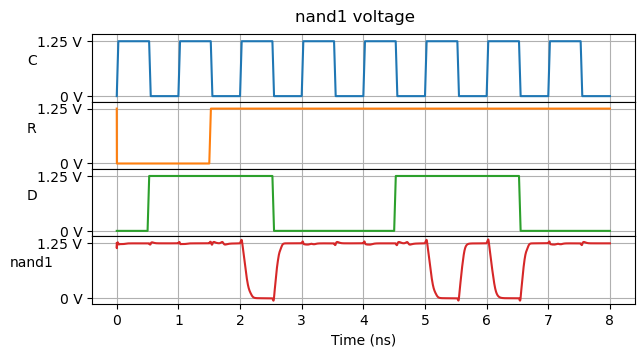

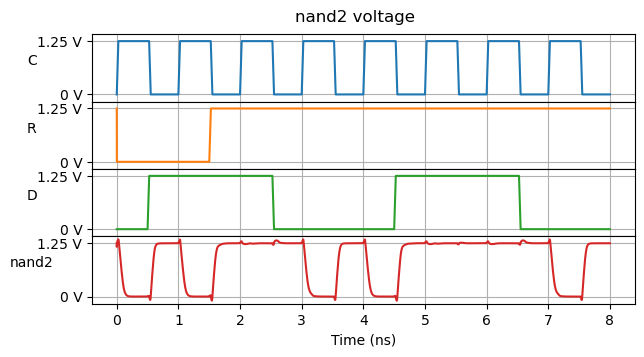

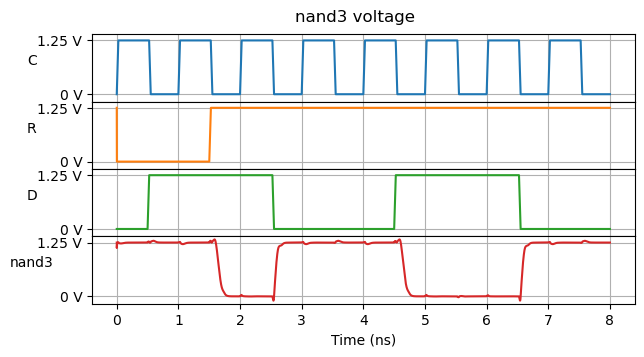

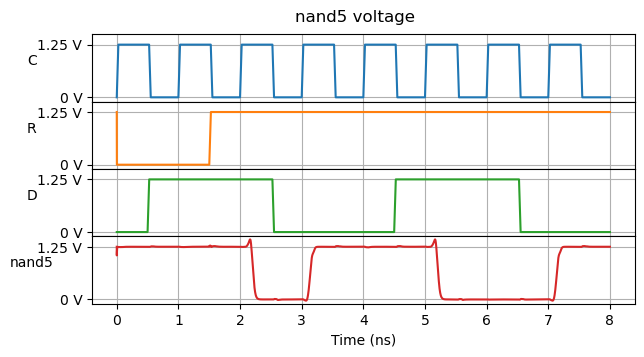

In [3]:
for gate in ['Q', 'nand0', 'nand1', 'nand2', 'nand3', 'nand5']:
    fig, axs = plt.subplots(4, 1, sharex=True, sharey=True)
    for j, sig in enumerate(['C', 'R', 'D', gate]):
        axs[j].plot(t[sig] * 1e9, x[sig], label=sig, color=f'C{j}')
        axs[j].grid()
        axs[j].set_yticks([0, 1.2], ['0 V', '1.25 V'])        
        axs[j].xaxis.set_major_locator(plticker.MultipleLocator(base=1))
        axs[j].set_ylabel(sig, rotation=0)
    axs[-1].set_xlabel('Time (ns)')    
    plt.subplots_adjust(hspace=0)
    plt.suptitle(f'{gate} voltage', y=0.95)